In [21]:
#Carga de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [22]:
df = pd.read_csv("winequalityN.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [23]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [25]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [26]:
df_limpio = df.dropna()

In [27]:
df_limpio.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [28]:
le = LabelEncoder()
df_limpio['type'] = le.fit_transform(df_limpio['type']) #0=blanco y 1=rojo

C:\Users\catit\AppData\Local\Temp\ipykernel_25332\334164047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['type'] = le.fit_transform(df_limpio['type']) #0=blanco y 1=rojo


In [29]:
X = df_limpio.drop('quality', axis=1)
y = df_limpio['quality']

In [30]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(X), index = X.index)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

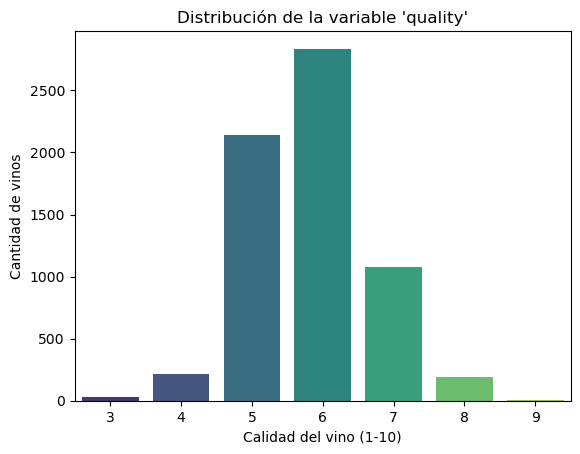

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


In [32]:
sns.countplot(data=df, x="quality", palette="viridis")
plt.title("Distribución de la variable 'quality'")
plt.xlabel("Calidad del vino (1-10)")
plt.ylabel("Cantidad de vinos")
plt.show()

conteo_quality = df["quality"].value_counts().sort_index()
print(conteo_quality)

In [33]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
y_train_df = pd.DataFrame(y_train).reset_index(drop=True)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# metricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"mae: {mae:}")
print(f"mse: {mse:}")
print(f"rmse: {rmse}")
print(f"r2: {r2}")

mae: 0.4345475638051044
mse: 0.37567308584686776
rmse: 0.6129217616032798
r2: 0.5068200019944907


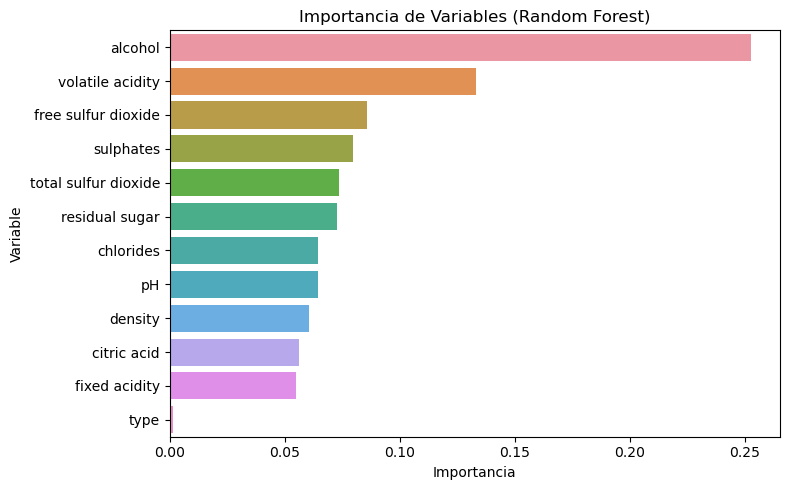

In [ ]:
# Importancia de variables
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Mostrar gráfica de importancia de variables.
plt.figure(figsize=(8, 5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Importancia de Variables (Random Forest)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

In [38]:
X_train.corr()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
type,1.000000,-0.488528,-0.652042,0.193413,0.345503,-0.531517,0.474771,0.695587,-0.385099,-0.318615,-0.489173,0.038589
fixed acidity,-0.488528,1.000000,0.226829,0.316345,-0.111064,0.305742,-0.275112,-0.319215,0.452515,-0.251757,0.303626,-0.095612
volatile acidity,-0.652042,0.226829,1.000000,-0.390893,-0.187368,0.391068,-0.351572,-0.408542,0.277400,0.253569,0.219328,-0.047964
citric acid,0.193413,0.316345,-0.390893,1.000000,0.152496,-0.000617,0.149333,0.203209,0.098505,-0.322932,0.050373,-0.012260
residual sugar,0.345503,-0.111064,-0.187368,0.152496,1.000000,-0.124647,0.406146,0.497606,0.560947,-0.264096,-0.179458,-0.358413
chlorides,-0.531517,0.305742,0.391068,-0.000617,-0.124647,1.000000,-0.201119,-0.284499,0.376421,0.055894,0.379427,-0.268193
free sulfur dioxide,0.474771,-0.275112,-0.351572,0.149333,0.406146,-0.201119,1.000000,0.721461,0.034147,-0.153486,-0.197030,-0.186411
total sulfur dioxide,0.695587,-0.319215,-0.408542,0.203209,0.497606,-0.284499,0.721461,1.000000,0.044830,-0.235582,-0.269345,-0.267401
density,-0.385099,0.452515,0.277400,0.098505,0.560947,0.376421,0.034147,0.044830,1.000000,0.012102,0.262683,-0.687808
pH,-0.318615,-0.251757,0.253569,-0.322932,-0.264096,0.055894,-0.153486,-0.235582,0.012102,1.000000,0.195181,0.112627


<Axes: >

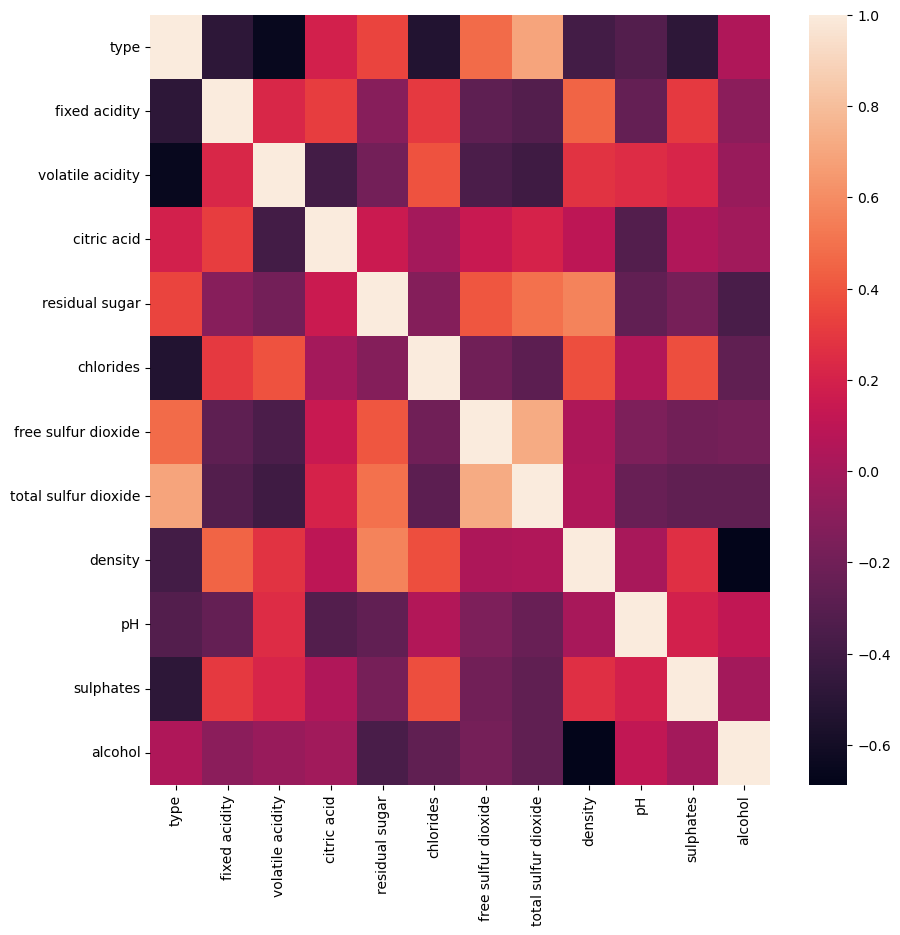

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr())